# Problem Statement:

A manufacturing company collects real-time data from hundreds of IoT sensors monitoring equipment health. The company needs to summarize sensor readings to detect anomalies, calculate rolling averages, and identify patterns over time. The project involves using pandas for time-based aggregation, rolling window calculations, and outlier detection to support predictive maintenance.


In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [5]:
df = pd.read_csv('iot-data.csv')
df.head()

,sensor_id,timestamp,temperature,vibration,status
0,6,2024-06-04 12:00:00,71.20,1.17,OK
1,2,2024-06-01 21:00:00,70.37,0.69,OK
2,10,2024-06-02 03:00:00,73.46,1.37,OK
3,4,2024-06-02 02:00:00,73.97,0.83,OK
4,4,2024-06-04 17:00:00,61.97,0.92,OK


In [34]:
df.shape

(100, 5)

In [35]:
df.dtypes

sensor_id        int64
timestamp       object
temperature    float64
vibration      float64
status          object
dtype: object

In [36]:
df.isnull().sum()

sensor_id      0
timestamp      0
temperature    0
vibration      0
status         0
dtype: int64

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_id    100 non-null    int64  
 1   timestamp    100 non-null    object 
 2   temperature  100 non-null    float64
 3   vibration    100 non-null    float64
 4   status       100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB
None


# ●	How do you resample sensor data to hourly or daily averages?

In [67]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# df.set_index('timestamp', inplace=True) # Set timestamp as index
hourly_averages = df.resample('H').mean()

print(hourly_averages)

daily_averages = df.resample('D').mean()
print(daily_averages)




                     sensor_id  temperature  vibration  rolling_temp
timestamp                                                           
2024-06-01 00:00:00       1.50      71.3400      0.950        71.460
2024-06-01 01:00:00       6.00      73.7700      1.200        69.824
2024-06-01 02:00:00       3.00      73.6950      0.930        68.985
2024-06-01 03:00:00       5.25      66.8075      0.925        68.153
2024-06-01 04:00:00       6.00      69.7400      1.130        71.990
...                        ...          ...        ...           ...
2024-06-04 22:00:00       3.00      71.6100      0.660        73.348
2024-06-04 23:00:00        NaN          NaN        NaN           NaN
2024-06-05 00:00:00        NaN          NaN        NaN           NaN
2024-06-05 01:00:00       9.00      77.3000      1.120        71.584
2024-06-05 02:00:00      10.00      69.3900      0.970        69.584

[99 rows x 4 columns]
            sensor_id  temperature  vibration  rolling_temp
timestamp           

C:\Users\rohit\AppData\Local\Temp\ipykernel_18948\3091018598.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_averages = df.resample('H').mean()
C:\Users\rohit\AppData\Local\Temp\ipykernel_18948\3091018598.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_averages = df.resample('D').mean()


# ●	How can you calculate a rolling mean for temperature readings?

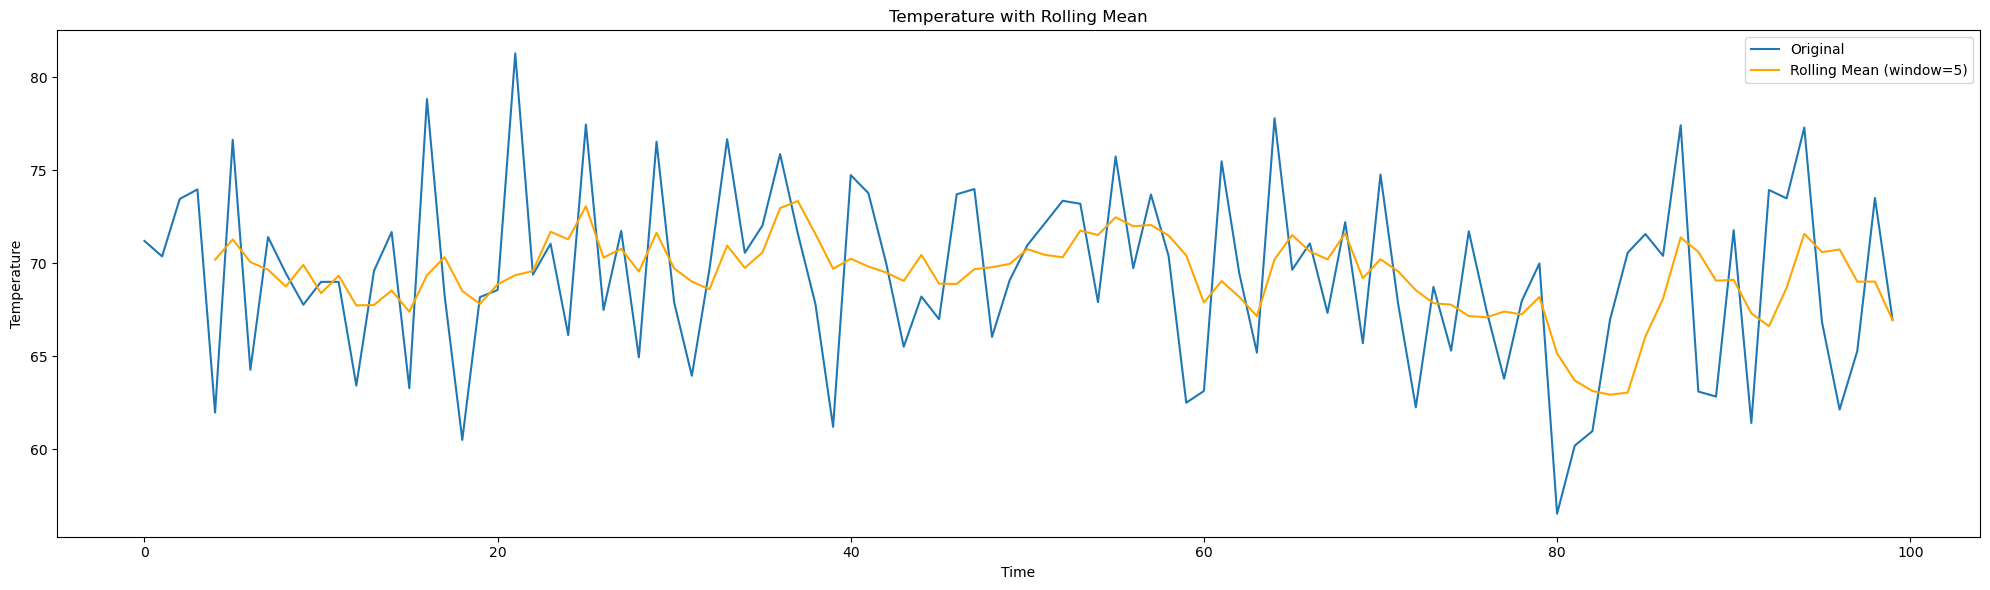

In [73]:
df['rolling_temp'] = df['temperature'].rolling(window=5).mean()



# Plot rolling mean
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['temperature'], label='Original')
plt.plot(df.index, df['rolling_temp'], label='Rolling Mean (window=5)', color='orange')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature with Rolling Mean')
plt.legend()
plt.tight_layout()
plt.show()

# ●	How do you identify sensors with the most frequent 'FAIL' status?

8    1
4    1
6    1
2    1
3    1
Name: sensor_id, dtype: int64


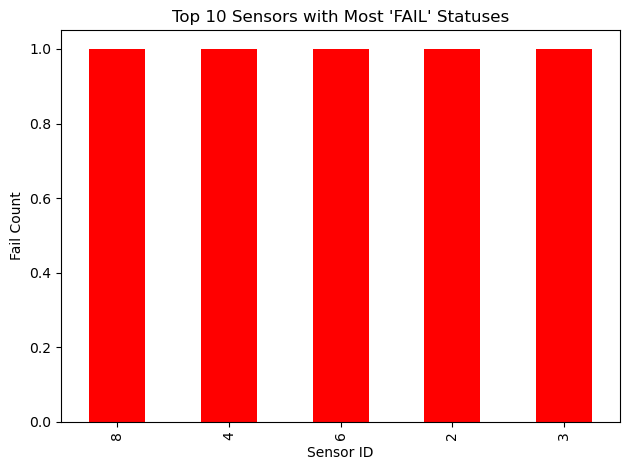

In [74]:
fail_counts = df[df['status'] == 'FAIL']['sensor_id'].value_counts()

print( fail_counts.head())

# Optional: Plot
fail_counts.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Sensors with Most 'FAIL' Statuses")
plt.xlabel("Sensor ID")
plt.ylabel("Fail Count")
plt.tight_layout()
plt.show()

# ●	How can you detect outliers in vibration data using pandas?

Outliers in vibration:
 Empty DataFrame
Columns: [sensor_id, timestamp, temperature, vibration, status, vibration_zscore, vibration_outlier]
Index: []


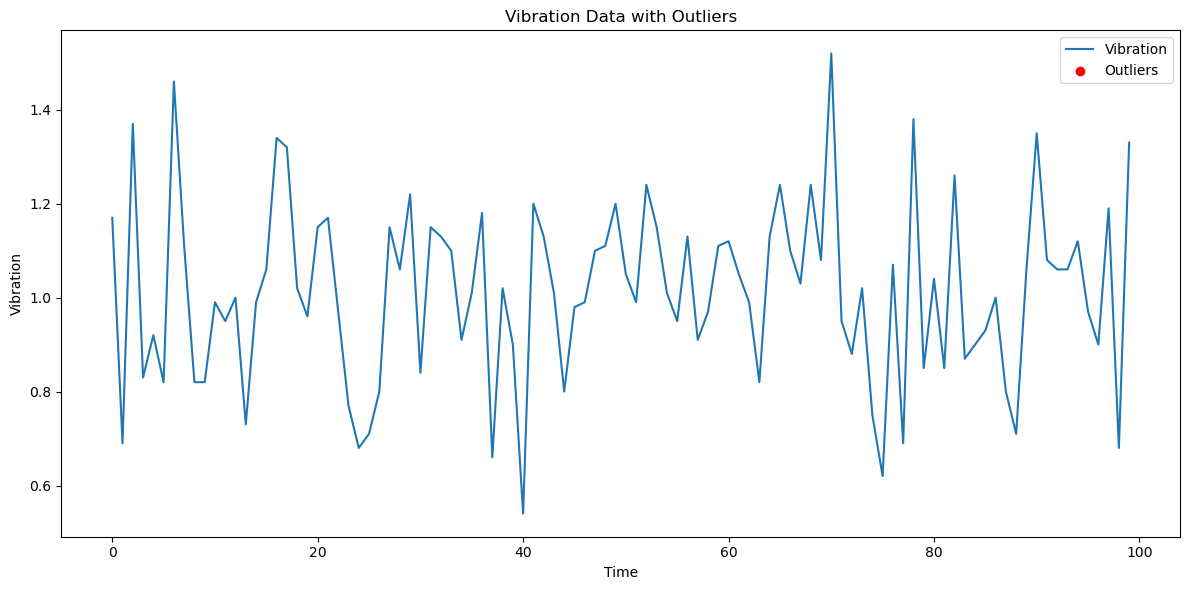

In [6]:
from scipy.stats import zscore


df['vibration_zscore'] = zscore(df['vibration'])


df['vibration_outlier'] = df['vibration_zscore'].abs() > 3


print("Outliers in vibration:\n", df[df['vibration_outlier']])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['vibration'], label='Vibration')
plt.scatter(df[df['vibration_outlier']].index,
            df[df['vibration_outlier']]['vibration'],
            color='red', label='Outliers')
plt.title("Vibration Data with Outliers")
plt.xlabel("Time")
plt.ylabel("Vibration")
plt.legend()
plt.tight_layout()
plt.show()

# ●	How do you plot temperature trends for a specific sensor over time?

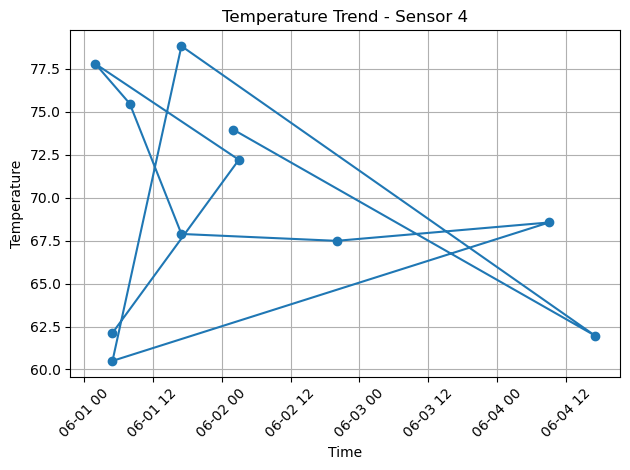

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
sensor_data = df[df['sensor_id'] == 4]
plt.plot(sensor_data['timestamp'], sensor_data['temperature'], marker='o')
plt.title('Temperature Trend - Sensor 4')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()